In [ ]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.preprocessing import StandardScaler
from   sklearn.cluster import KMeans

#Upload data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/2012_SAT_Results.csv'
schools = pd.read_csv(file_path)

#Check the data
print(schools.info())
print(schools.describe())
print(schools.isnull().sum())
print(schools.dtypes)
#There are no non-null columns but we should convert 's' to the numeric values like mean

#Convert columns to numeric, replacing 's' with NaN
schools['Num of SAT Test Takers'] = pd.to_numeric(schools['Num of SAT Test Takers'], errors= 'coerce')
schools['SAT Critical Reading Avg. Score'] = pd.to_numeric(schools['SAT Critical Reading Avg. Score'], errors = 'coerce')
schools['SAT Math Avg. Score'] = pd.to_numeric(schools['SAT Math Avg. Score'], errors = 'coerce')
schools['SAT Writing Avg. Score'] = pd.to_numeric(schools['SAT Writing Avg. Score'], errors = 'coerce')

#Handle NaN values (fill with column mean)
schools['Num of SAT Test Takers'].fillna(schools['Num of SAT Test Takers'].mean(), inplace=True)
schools['SAT Critical Reading Avg. Score'].fillna(schools['SAT Critical Reading Avg. Score'].mean(), inplace=True)
schools['SAT Math Avg. Score'].fillna(schools['SAT Math Avg. Score'].mean(), inplace=True)
schools['SAT Writing Avg. Score'].fillna(schools['SAT Writing Avg. Score'].mean(), inplace=True)

#Save the cleaned data to a new CSV file
schools.to_csv('Cleaned_SAT_Results.csv', index=False)

In [ ]:
#1) What are the top 5 schools based on the number of SAT test takers?
TopFiveNumSatTestTakers = schools.sort_values(by= 'Num of SAT Test Takers', ascending=False)
TopFiveNumSatTestTakers = TopFiveNumSatTestTakers[['SCHOOL NAME', 'Num of SAT Test Takers']]
print(TopFiveNumSatTestTakers.head(5))

                         SCHOOL NAME  Num of SAT Test Takers
249   BROOKLYN TECHNICAL HIGH SCHOOL                  1277.0
401        FRANCIS LEWIS HIGH SCHOOL                   934.0
400  BENJAMIN N. CARDOZO HIGH SCHOOL                   888.0
48            STUYVESANT HIGH SCHOOL                   832.0
363              MIDWOOD HIGH SCHOOL                   824.0


In [ ]:
#2) Which schools have the fewest test takers?
FewestNumSatTestTakers = schools.sort_values(by= 'Num of SAT Test Takers', ascending=True)
FewestNumSatTestTakers = FewestNumSatTestTakers[['SCHOOL NAME', 'Num of SAT Test Takers']]
print(FewestNumSatTestTakers.head(5))

                                      SCHOOL NAME  Num of SAT Test Takers
419  QUEENS SATELLITE HIGH SCHOOL FOR OPPORTUNITY                     6.0
147                        HERBERT H. LEHMAN YABC                     6.0
112                        GEORGE WASHINGTON YABC                     7.0
3                       FORSYTH SATELLITE ACADEMY                     7.0
399            NORTH QUEENS COMMUNITY HIGH SCHOOL                     7.0


In [ ]:
#3) What is the average number of SAT test takers across all schools?
AverageNumSATtakers = schools['Num of SAT Test Takers'].mean()
AverageNumSATtakers = round(AverageNumSATtakers, 2)
print(f'The average number of SAT test takers across all schools is {AverageNumSATtakers}.')

The average number of SAT test takers across all schools is 110.32.


In [ ]:
#4) What are the top 5 schools in each borough based on the average reading score?
schools['Borough_code'] = schools['DBN'].str[2]  #Extract the third character
Borough_Mapping = {'M':'Manhattan', 'X':'Bronx','K':'Brooklyn','Q':'Queens','R':'Staten Island'}  #Create a dictionary of boroughs
schools['Borough'] = schools['Borough_code'].map(Borough_Mapping)
#print(schools[['DBN', 'Borough']].head(10))
Filtered_Data = schools[['SCHOOL NAME', 'Borough', 'SAT Critical Reading Avg. Score']]
TopFiveBoroughReading = Filtered_Data.sort_values(['Borough', 'SAT Critical Reading Avg. Score'], ascending=[True, False])
print(TopFiveBoroughReading.groupby('Borough').head(5))

                                           SCHOOL NAME        Borough  \
206  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE          Bronx   
198                       BRONX HIGH SCHOOL OF SCIENCE          Bronx   
163           BRONX CENTER FOR SCIENCE AND MATHEMATICS          Bronx   
212          COLLEGIATE INSTITUTE FOR MATH AND SCIENCE          Bronx   
179  RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...          Bronx   
249                     BROOKLYN TECHNICAL HIGH SCHOOL       Brooklyn   
265                         BROOKLYN LATIN SCHOOL, THE       Brooklyn   
366     LEON M. GOLDSTEIN HIGH SCHOOL FOR THE SCIENCES       Brooklyn   
363                                MIDWOOD HIGH SCHOOL       Brooklyn   
312            MEDGAR EVERS COLLEGE PREPARATORY SCHOOL       Brooklyn   
48                              STUYVESANT HIGH SCHOOL      Manhattan   
8                       BARD HIGH SCHOOL EARLY COLLEGE      Manhattan   
107  HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN

In [ ]:
#5) Which schools have the lowest average reading scores?
LowestAverageReading = schools.sort_values(by= 'SAT Critical Reading Avg. Score', ascending=True)
LowestAverageReading = LowestAverageReading[['SCHOOL NAME', 'SAT Critical Reading Avg. Score']]
print(LowestAverageReading.head(10))

                                       SCHOOL NAME  \
337                      MULTICULTURAL HIGH SCHOOL   
300  INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
187          INTERNATIONAL SCHOOL FOR LIBERAL ARTS   
239                  HIGH SCHOOL OF WORLD CULTURES   
184          KINGSBRIDGE INTERNATIONAL HIGH SCHOOL   
250             BROOKLYN INTERNATIONAL HIGH SCHOOL   
121            INTERNATIONAL COMMUNITY HIGH SCHOOL   
371           ASPIRATIONS DIPLOMA PLUS HIGH SCHOOL   
316                     IT TAKES A VILLAGE ACADEMY   
170                BRONX INTERNATIONAL HIGH SCHOOL   

     SAT Critical Reading Avg. Score  
337                            279.0  
300                            287.0  
187                            300.0  
239                            304.0  
184                            304.0  
250                            305.0  
121                            310.0  
371                            311.0  
316                            313.0  
170            

In [ ]:
#6) Which borough has the highest average math scores?
HighestMathScoresBorough = schools.groupby('Borough')['SAT Math Avg. Score'].mean()
HighestMathScoresBorough = HighestMathScoresBorough.sort_values(ascending=False)
print(HighestMathScoresBorough.head(1))

Borough
Staten Island    459.105244
Name: SAT Math Avg. Score, dtype: float64


In [ ]:
#7) Which borough has the lowest average writing scores?
LowestWritingScoresBorough = schools.groupby('Borough')['SAT Writing Avg. Score'].mean()
LowestWritingScoresBorough = LowestWritingScoresBorough.sort_values(ascending=True)
print(LowestWritingScoresBorough.head(1))

Borough
Bronx    378.497996
Name: SAT Writing Avg. Score, dtype: float64


In [ ]:
#8) What is the average total SAT score across all schools?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
AverageTotalSAT = schools['Total SAT Scores'].mean().round(2)
print(f'The average total SAT scores is: {AverageTotalSAT}')

The average total SAT scores is: 1208.2


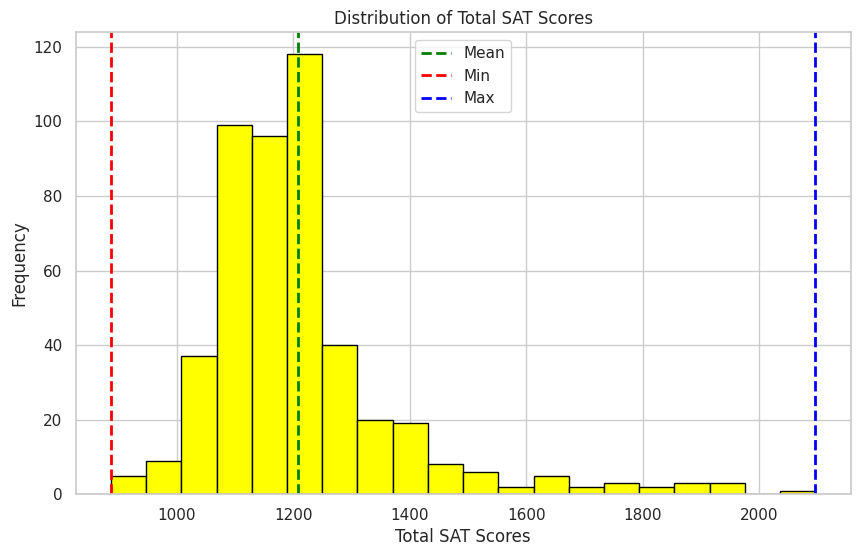

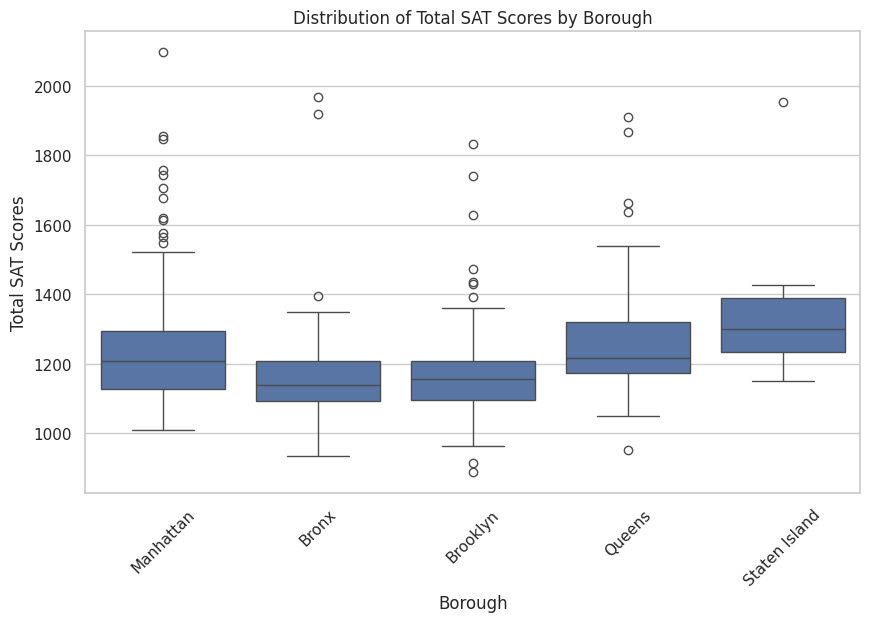

               count         mean         std     min      25%          50%  \
Borough                                                                       
Bronx          128.0  1153.528726  129.647779   934.0  1091.50  1139.500000   
Brooklyn       138.0  1171.797566  129.939475   887.0  1096.25  1155.500000   
Manhattan      121.0  1253.736067  190.141467  1008.0  1128.00  1208.204276   
Queens          78.0  1268.482490  167.879211   951.0  1173.25  1217.000000   
Staten Island   13.0  1347.554175  201.191505  1150.0  1235.00  1301.000000   

                       75%     max  
Borough                             
Bronx          1208.204276  1969.0  
Brooklyn       1208.204276  1833.0  
Manhattan      1293.000000  2096.0  
Queens         1320.500000  1910.0  
Staten Island  1388.000000  1953.0  


In [ ]:
#9) What is the distribution of total SAT scores (e.g., histogram or boxplot)?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']

#Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(schools['Total SAT Scores'].dropna(), bins=20, color= 'yellow', edgecolor= 'black')
plt.axvline(schools['Total SAT Scores'].mean(), color = 'green', linestyle = 'dashed', linewidth = 2, label = 'Mean')
plt.axvline(schools['Total SAT Scores'].min(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Min')
plt.axvline(schools['Total SAT Scores'].max(), color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'Max')
plt.title('Distribution of Total SAT Scores')
plt.xlabel('Total SAT Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Boxplot for Total SAT Scores by Borough
plt.figure(figsize=(10, 6))
sns.boxplot(x= schools['Borough'] , y= 'Total SAT Scores', data= schools)
plt.title('Distribution of Total SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Scores')
plt.xticks(rotation=45)
plt.show()

#Display the summary statistics
borough_stats = schools.groupby('Borough')['Total SAT Scores'].describe()
print(borough_stats)

In [ ]:
#10) Which borough has the highest average total SAT score?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
HighestTotalAverageBorough = schools.groupby('Borough')['Total SAT Scores'].mean()
HighestTotalAverageBorough = HighestTotalAverageBorough.sort_values(ascending=False)
print(HighestTotalAverageBorough.head(1))

Borough
Staten Island    1347.554175
Name: Total SAT Scores, dtype: float64


In [ ]:
#11) Which borough has the greatest variability (standard deviation) in total SAT scores?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
GreatestSTDBorough = schools.groupby('Borough')['Total SAT Scores'].std()
GreatestSTDBorough = GreatestSTDBorough.sort_values(ascending=False)
print(GreatestSTDBorough.head(1))

Borough
Staten Island    201.191505
Name: Total SAT Scores, dtype: float64


Borough
Staten Island    459.11
Queens           440.11
Manhattan        429.91
Brooklyn         399.85
Bronx            391.36
Name: SAT Math Avg. Score, dtype: float64


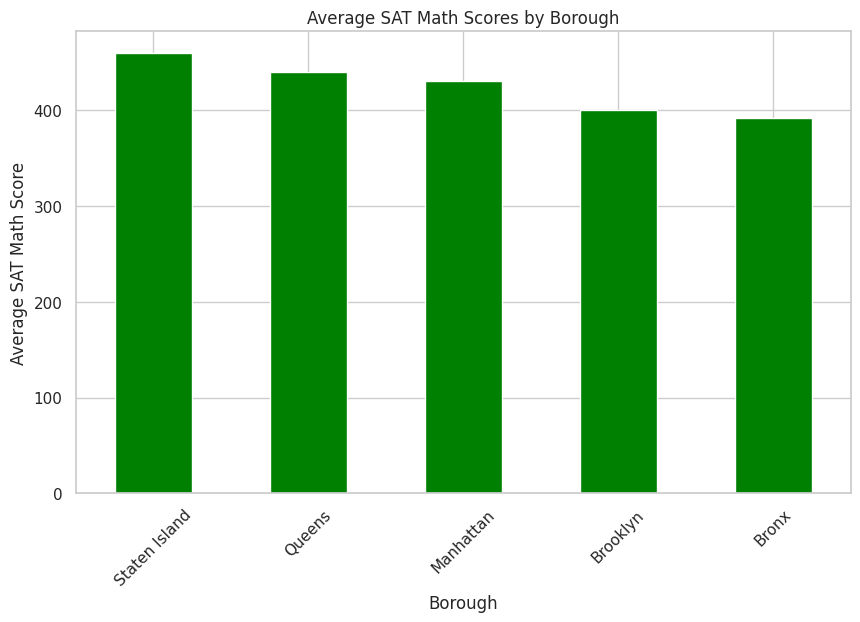

In [ ]:
#12) How does the average SAT math score compare between boroughs?
AverageMathScoresBorough = schools.groupby('Borough')['SAT Math Avg. Score'].mean().round(2)
AverageMathScoresBorough = AverageMathScoresBorough.sort_values(ascending=False)
print(AverageMathScoresBorough)

plt.figure(figsize=(10, 6))
AverageMathScoresBorough.plot(kind ='bar', color='green')
plt.title('Average SAT Math Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average SAT Math Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#13) Is there a relationship between the number of test takers and total SAT scores?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
correlation1 = schools['Num of SAT Test Takers'].corr(schools['Total SAT Scores'])
print(f'The correlation is:{correlation1}')

The correlation is:0.48263870897987365


In [ ]:
#14) Which borough has the most schools performing above the city-wide average total SAT score?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
AverageTotalSAT = schools['Total SAT Scores'].mean().round(2)
TopSchools = schools[schools['Total SAT Scores']> AverageTotalSAT]
TopSchools = TopSchools.groupby('Borough').size().sort_values(ascending=False)
print(TopSchools.head(1))

Borough
Manhattan    62
dtype: int64


In [ ]:
#15) Rank boroughs based on their combined average performance across all SAT categories (reading, math, and writing).
BoroughAverages = schools.groupby('Borough')[['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score']].mean()
BoroughAveragesTotalSAT = (BoroughAverages['SAT Critical Reading Avg. Score'] + BoroughAverages['SAT Math Avg. Score'] + BoroughAverages['SAT Writing Avg. Score'])
BoroughAveragesTotalSAT = BoroughAveragesTotalSAT.sort_values(ascending=False)
print(BoroughAveragesTotalSAT)

Borough
Staten Island    1347.554175
Queens           1268.482490
Manhattan        1253.736067
Brooklyn         1171.797566
Bronx            1153.528726
dtype: float64


In [ ]:
#16) Are there any schools that perform consistently well across all three SAT sections (reading, math, and writing)?
MathAverage = schools['SAT Math Avg. Score'].mean()
ReadingAverage = schools['SAT Critical Reading Avg. Score'].mean()
WritingAverage = schools['SAT Writing Avg. Score'].mean()
ConsistentSchools = schools[(schools['SAT Math Avg. Score'] > MathAverage) & (schools['SAT Critical Reading Avg. Score'] > ReadingAverage) & (schools['SAT Writing Avg. Score'] > WritingAverage)]
ConsistentSchools = ConsistentSchools.sort_values(by= 'Total SAT Scores', ascending=False)
print(ConsistentSchools[['SCHOOL NAME', 'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']].head(10))

                                           SCHOOL NAME  SAT Math Avg. Score  \
48                              STUYVESANT HIGH SCHOOL                735.0   
198                       BRONX HIGH SCHOOL OF SCIENCE                688.0   
459                STATEN ISLAND TECHNICAL HIGH SCHOOL                682.0   
206  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE                648.0   
396                        TOWNSEND HARRIS HIGH SCHOOL                651.0   
427  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...                660.0   
8                       BARD HIGH SCHOOL EARLY COLLEGE                604.0   
107  HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...                654.0   
249                     BROOKLYN TECHNICAL HIGH SCHOOL                659.0   
33                       ELEANOR ROOSEVELT HIGH SCHOOL                594.0   

     SAT Critical Reading Avg. Score  SAT Writing Avg. Score  
48                             679.0                   682.0  
198 

In [ ]:
#17) Identify schools that have unusually high test taker numbers but lower total SAT scores. What might explain this pattern?
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
TopTestTakers = schools.sort_values(by= 'Num of SAT Test Takers', ascending=False).head(50)
#print(TopTestTakers[['SCHOOL NAME', 'Num of SAT Test Takers', 'Total SAT Scores']])
LowestSatScores = TopTestTakers.sort_values(by= 'Total SAT Scores', ascending=True)
print(LowestSatScores[['SCHOOL NAME', 'Num of SAT Test Takers', 'Total SAT Scores']].head(20))

                                          SCHOOL NAME  Num of SAT Test Takers  \
365                        SHEEPSHEAD BAY HIGH SCHOOL                   236.0   
413                         RICHMOND HILL HIGH SCHOOL                   404.0   
402                      MARTIN VAN BUREN HIGH SCHOOL                   334.0   
414                            JOHN ADAMS HIGH SCHOOL                   403.0   
423                             HILLCREST HIGH SCHOOL                   462.0   
379                               NEWTOWN HIGH SCHOOL                   320.0   
381                      GROVER CLEVELAND HIGH SCHOOL                   241.0   
394                              FLUSHING HIGH SCHOOL                   347.0   
443                      LONG ISLAND CITY HIGH SCHOOL                   392.0   
353                       ABRAHAM LINCOLN HIGH SCHOOL                   475.0   
52   MURRY BERGTRAUM HIGH SCHOOL FOR BUSINESS CAREERS                   264.0   
146                     HERB

In [ ]:
#18) Do boroughs with fewer schools tend to have higher average scores?
NumberSchoolsBorough = schools.groupby('Borough').size()
AverageScoresBorough = schools.groupby('Borough')[['Total SAT Scores', 'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']].mean()
CorrelationTotal = NumberSchoolsBorough.corr(AverageScoresBorough['Total SAT Scores'])
CorrelationMath = NumberSchoolsBorough.corr(AverageScoresBorough['SAT Math Avg. Score'])
CorrelationReading = NumberSchoolsBorough.corr(AverageScoresBorough['SAT Critical Reading Avg. Score'])
CorrelationWriting = NumberSchoolsBorough.corr(AverageScoresBorough['SAT Writing Avg. Score'])
print(f'The correlation between the number of schools and the total SAT scores is: {CorrelationTotal}')
print(f'The correlation between the number of schools and the SAT math scores is: {CorrelationMath}')
print(f'The correlation between the number of schools and the SAT reading scores is: {CorrelationReading}')
print(f'The correlation between the number of schools and the SAT writing scores is: {CorrelationWriting}')

The correlation between the number of schools and the total SAT scores is: -0.9093935710491771
The correlation between the number of schools and the SAT math scores is: -0.8804899081445843
The correlation between the number of schools and the SAT reading scores is: -0.9259343665091543
The correlation between the number of schools and the SAT writing scores is: -0.9110211152995789


In [ ]:
#19) Create a custom performance metric (e.g., a weighted average of SAT categories) and rank schools based on this metric.
schools['CustomMetric'] = ((schools['SAT Math Avg. Score'] * 0.4) + (schools['SAT Critical Reading Avg. Score'] * 0.3) + (schools['SAT Writing Avg. Score'] * 0.3))
#print(schools['CustomMetric'].head(10)) #check the values
RankedSchools = schools.sort_values(by= 'CustomMetric', ascending=False)
print(RankedSchools[['SCHOOL NAME', 'CustomMetric']].head(10))

                                           SCHOOL NAME  CustomMetric
48                              STUYVESANT HIGH SCHOOL         702.3
198                       BRONX HIGH SCHOOL OF SCIENCE         659.5
459                STATEN ISLAND TECHNICAL HIGH SCHOOL         654.1
206  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE         640.8
396                        TOWNSEND HARRIS HIGH SCHOOL         638.1
427  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...         626.4
107  HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...         619.5
8                       BARD HIGH SCHOOL EARLY COLLEGE         617.2
249                     BROOKLYN TECHNICAL HIGH SCHOOL         615.8
33                       ELEANOR ROOSEVELT HIGH SCHOOL         586.8


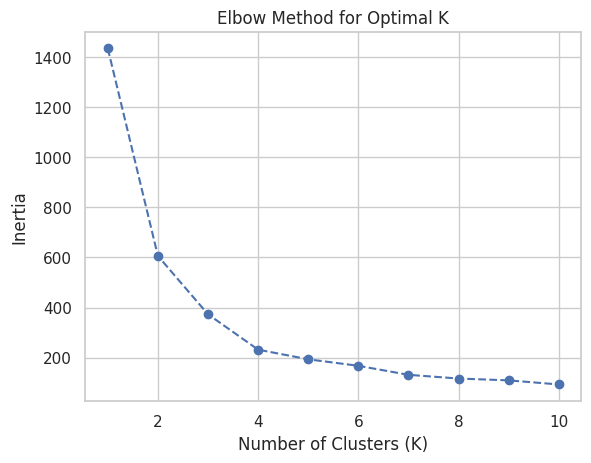

Cluster Centers (Centroids):
[[ 0.88342658  0.86767746  0.85022894]
 [-0.77231838 -0.79405879 -0.754965  ]
 [ 3.70982824  3.9309377   3.98757538]
 [-0.04668147 -0.03713303 -0.07428108]
 [ 2.0681097   2.03668687  2.1717836 ]]


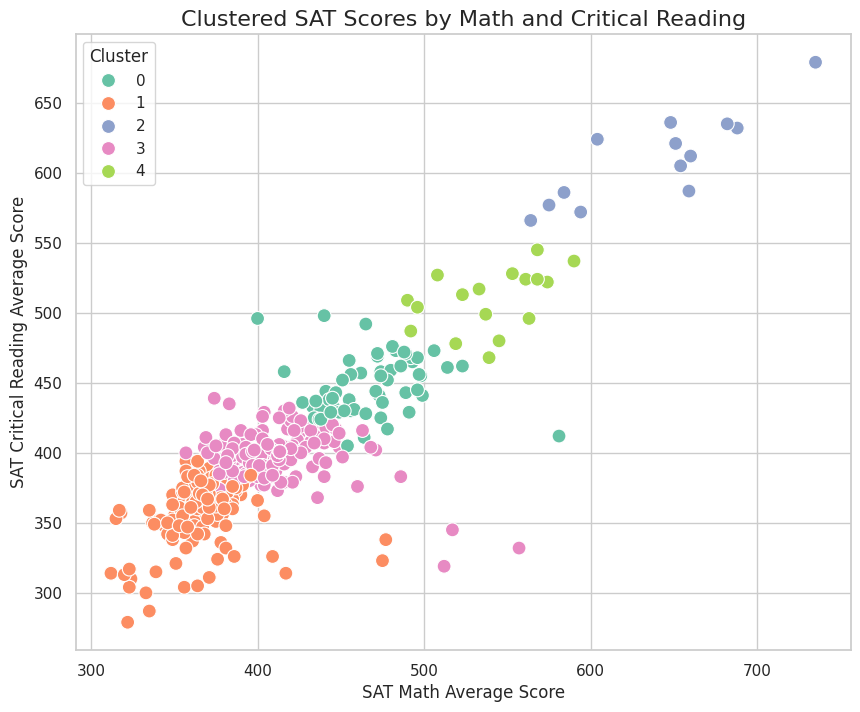

   Cluster  Total SAT Scores
0        2       1861.615385
1        4       1561.411765
2        0       1354.700000
3        3       1199.313972
4        1       1077.601227
   Cluster  SAT Math Avg. Score
0        2           638.307692
1        4           538.764706
2        0           466.933333
3        3           410.537714
4        1           366.539877
   Cluster  SAT Critical Reading Avg. Score
0        2                       610.153846
1        4                       509.294118
2        0                       447.050000
3        3                       398.873201
4        1                       358.570552
   Cluster  SAT Writing Avg. Score
0        2              613.153846
1        4              513.352941
2        0              440.716667
3        3              389.903056
4        1              352.490798


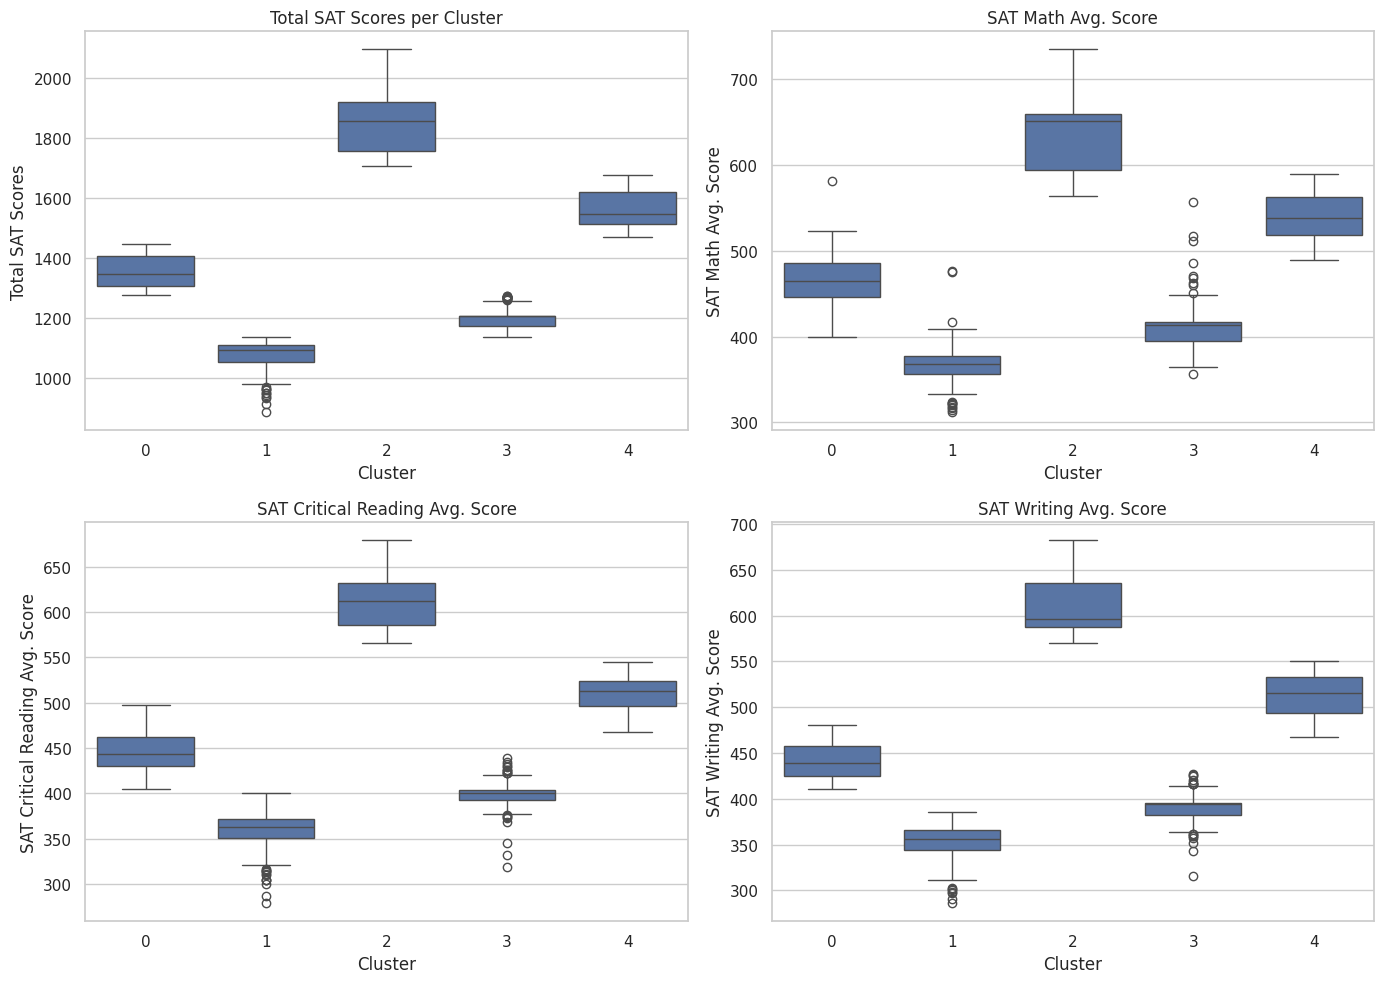

In [ ]:
#20) Perform a cluster analysis to group schools with similar SAT performance profiles.

#Adding essential data
schools['Total SAT Scores'] = schools['SAT Critical Reading Avg. Score'] + schools['SAT Math Avg. Score'] + schools['SAT Writing Avg. Score']
schools['Borough_code'] = schools['DBN'].str[2]  #Extract the third character
Borough_Mapping = {'M':'Manhattan', 'X':'Bronx','K':'Brooklyn','Q':'Queens','R':'Staten Island'}  #Create a dictionary of boroughs
schools['Borough'] = schools['Borough_code'].map(Borough_Mapping)

#scale the data
Features = schools[['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']]
Scaler = StandardScaler()
ScaledFeatures = Scaler.fit_transform(Features)

#Applying Elbow method
Interia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(ScaledFeatures)
  Interia.append(kmeans.inertia_)

#Plot the k results
plt.plot(range(1,11), Interia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#Run K-means clustering with K=5 (based on the chart)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

#Assign the cluster labels to each school
schools['Cluster'] = kmeans.fit_predict(ScaledFeatures)
print(f'Cluster Centers (Centroids):\n{kmeans.cluster_centers_}') #Check
schools['Cluster'] = kmeans.labels_ #Add the labels

#Create a 2D plot based on the clustered SAT Scores(Math & Reading)
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.scatterplot(data=schools, x='SAT Math Avg. Score', y='SAT Critical Reading Avg. Score', hue='Cluster', palette='Set2', s=100)
plt.title('Clustered SAT Scores by Math and Critical Reading', fontsize=16)
plt.xlabel('SAT Math Average Score', fontsize=12)
plt.ylabel('SAT Critical Reading Average Score', fontsize=12)
plt.legend(title='Cluster', loc='upper left')
plt.show()

#Grouping by cluster, calculating the mean, and sorting
AverageScoresCluster= schools.groupby('Cluster')[['Total SAT Scores', 'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']].mean()
SortedClustersTotal= AverageScoresCluster.sort_values(by= 'Total SAT Scores', ascending=False)
SortedClustersMath= AverageScoresCluster.sort_values(by= 'SAT Math Avg. Score', ascending=False)
SortedClustersReading= AverageScoresCluster.sort_values(by= 'SAT Critical Reading Avg. Score', ascending=False)
SortedClustersWriting= AverageScoresCluster.sort_values(by= 'SAT Writing Avg. Score', ascending=False)

SortedClustersTotal = SortedClustersTotal.reset_index()
SortedClustersMath = SortedClustersMath.reset_index()
SortedClustersReading = SortedClustersReading.reset_index()
SortedClustersWriting = SortedClustersWriting.reset_index()

print(SortedClustersTotal[['Cluster', 'Total SAT Scores']])
print(SortedClustersMath[['Cluster', 'SAT Math Avg. Score']])
print(SortedClustersReading[['Cluster', 'SAT Critical Reading Avg. Score']])
print(SortedClustersWriting[['Cluster', 'SAT Writing Avg. Score']])

#Create a box plot for each SAT category per cluster
fig, axes = plt.subplots(2 ,2 , figsize=(14, 10))
sns.boxplot(x='Cluster', y='Total SAT Scores', data=schools, ax=axes[0, 0])
axes[0, 0].set_title('Total SAT Scores per Cluster')
sns.boxplot(x='Cluster', y='SAT Math Avg. Score', data=schools, ax=axes[0,1])
axes[0, 1].set_title('SAT Math Avg. Score')
sns.boxplot(x='Cluster', y='SAT Critical Reading Avg. Score', data=schools, ax=axes[1, 0])
axes[1, 0].set_title('SAT Critical Reading Avg. Score')
sns.boxplot(x='Cluster', y='SAT Writing Avg. Score', data=schools, ax=axes[1, 1])
axes[1, 1].set_title('SAT Writing Avg. Score')
plt.tight_layout()
plt.show()